In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import numpy as np
from astropy.time import Time


In [29]:
#Reading the data
file= 'xmm-nustar_SGRJ1935_un-obs-flux.dat'
Data = np.loadtxt(file)


MJD = Data[:,0]
log10F = Data[:,1]
log10F_lower_error = Data[:,2]
log10F_upper_error = Data[:,3]
obs_name = Data[:,4]

In [30]:
log10F

array([-10.7547, -10.8428])

In [31]:
# get the mjd from "datetime.ipynb", get the everage (start+end)/2
# To calculate the fux obtained from xspec 10e*flux

Flux = 10**log10F
print('### Initial flux values:\n', Flux)

### Initial flux values:
 [1.75913836e-11 1.43615065e-11]


In [32]:
print('### initial lower error of the flux:\n', log10F_lower_error)
print('### initial upper error of the flux:\n', log10F_upper_error)

### initial lower error of the flux:
 [-10.7583 -10.8469]
### initial upper error of the flux:
 [-10.7512 -10.8387]


In [37]:
# Get the natuaral logrithm for the flux uncertunity
Flux_lower = 10**log10F_lower_error
Flux_upper = 10**log10F_upper_error


In [42]:
Error_lower = Flux - Flux_lower
Error_upper = Flux_upper - Flux  

print('### flux of the lower error:\n', Error_lower)
print('### flux of the upper error:\n', Error_upper)


### flux of the lower error:
 [1.45217659e-13 1.34943248e-13]
### flux of the upper error:
 [1.42342605e-13 1.36223225e-13]


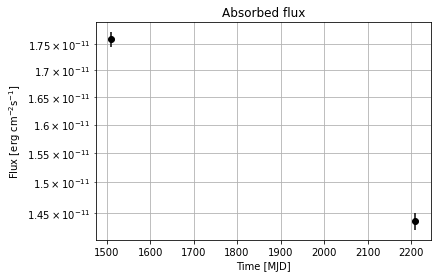

In [43]:
label = obs_name
#Flux Plot
plt.figure()
plt.xlabel("Time [MJD]")
plt.ylabel(r"Flux [erg cm$^{-2}$s$^{-1}$]")
plt.title("Absorbed flux")
plt.errorbar(MJD, Flux, yerr=[Error_lower,Error_upper], fmt='.k', ecolor='black', marker='o')# elinewidth=1,  mfc='k')
plt.gca().set_yscale('log')
plt.grid(which='both')
#plt.legend(p, label)

plt.savefig("xmm-nustar_J1818_un-obs-flux.png")
plt.show()

In [48]:
#======================================================
		# Calculate the luminosity
#======================================================
#dpc = 4.8 #kpc = 4800 pc
#d = 1.4811e+22 #distance in units of centimeter
d = 2.0365e+22 #d =6.6 kpc
L_best = 4*np.pi*Flux*d**2
print('### Best Luminosity:\n', L_best)

L_lower = L_best - (Flux_lower*4*np.pi*d**2)
L_upper = Flux_upper*(4*np.pi*d**2) - L_best

print('### Luminosity with lower uncertunities:\n', L_lower)
print('### Luminosity with upper uncertunities:\n', L_upper)

### Best Luminosity:
 [9.16808630e+34 7.48477402e+34]
### Luminosity with lower uncertunities:
 [7.56829629e+32 7.03282565e+32]
### Luminosity with upper uncertunities:
 [7.41845730e+32 7.09953413e+32]


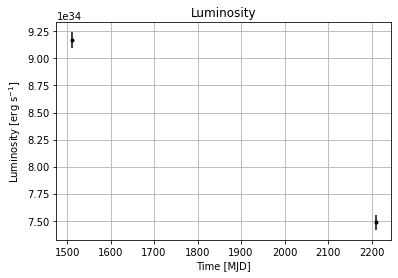

In [49]:
#Plot
plt.figure()
plt.xlabel("Time [MJD]")
plt.ylabel(r"Luminosity [erg s$^{-1}$]")
plt.title("Luminosity")
plt.errorbar(MJD, L_best, yerr=[L_lower,L_upper], fmt='.k', ecolor='black')# elinewidth=5,  mfc='k')
#plt.gca().set_yscale('log')
plt.grid(which='both')
plt.savefig("xmm-nustar_J1818_un-obs-flux_luminosity_.png")
plt.show()

